In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

In [37]:
rat_data = "clean_csv/final_rat_sightings.csv"
rat_sightings = pd.read_csv(rat_data)
rat_sightings.rename(inde)
rat_sightings.head()

,Unnamed: 0,Incident ID,Sighting Date,Complaint Type,Incident,Location Type,Incident Zip,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Sighting Year Month,Sighting Year
0,0,31464015,2015-09-04,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006,Manhattan,980656.0,197137.0,40.707772,-74.012963,2015-09,2015
1,1,31464024,2015-09-04,Rodent,Rat Sighting,Commercial Building,10306,Staten Island,955207.0,148858.0,40.575209,-74.104547,2015-09,2015
2,2,31464025,2015-09-04,Rodent,Rat Sighting,1-2 Family Dwelling,10310,Staten Island,949033.0,169278.0,40.631236,-74.126878,2015-09,2015
3,3,31464026,2015-09-04,Rodent,Rat Sighting,3+ Family Apt. Building,11206,Brooklyn,1000550.0,197585.0,40.708987,-73.941207,2015-09,2015
4,4,31464027,2015-09-04,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462,Bronx,1021648.0,250489.0,40.854130,-73.864813,2015-09,2015


In [4]:
sight_count = rat_sightings.groupby(["Sighting Year Month"]).count()["Incident ID"]
sight_count.index=sight_count.index.to_series().astype(str)

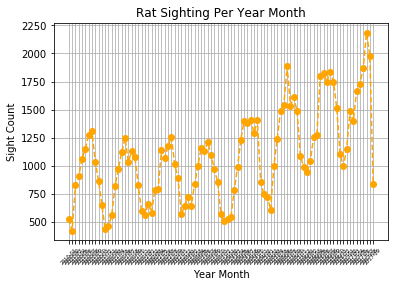

In [5]:
plt.plot(sight_count.index, sight_count,'o--', c="orange")
plt.title("Rat Sighting Per Year Month")
plt.ylabel("Sight Count")
plt.xlabel("Year Month")
plt.xticks(rotation=45)
plt.tick_params(axis='x', which='major', labelsize=5)
plt.grid(True)
plt.show()

In [38]:
sight_count_year = rat_sightings.groupby(["Sighting Year"]).count()["Incident ID"]
sight_count_year.index=sight_count_year.index.to_series().astype(str)

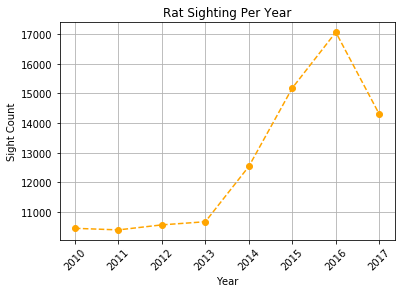

In [54]:
plt.plot(sight_count_year.index, sight_count_year,'o--', c="orange")
plt.title("Rat Sighting Per Year")
plt.ylabel("Sight Count")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.grid(True)
plt.show()

In [6]:
from scipy import stats
y = sight_count.values
x = np.arange(93)

In [7]:
stats.linregress(x, y)

LinregressResult(slope=9.035555489242338, intercept=672.1601464195836, rvalue=0.6018385404044592, pvalue=1.7648990217283327e-10, stderr=1.2568780587277346)

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

In [9]:
lin_reg_y = (slope * x) + intercept

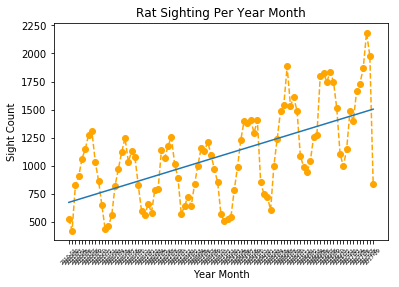

In [58]:
f, ax = plt.subplots()
ax.plot(sight_count.index, sight_count,'o--', c="orange")
ax.plot(sight_count.index, lin_reg_y)

plt.title("Rat Sighting Per Year Month")
plt.ylabel("Sight Count")
plt.xlabel("Year Month")

plt.xticks(rotation=45)
plt.tick_params(axis='x', which='major', labelsize=5)

plt.show()

In [20]:
nyc_temp_data = "clean_csv/final_weather.csv"
nyc_temp = pd.read_csv(nyc_temp_data)
nyc_temp["Year Month"] = pd.to_datetime(nyc_temp["Date"]).dt.to_period('M')
nyc_temp["Year"] = pd.to_datetime(nyc_temp["Date"]).dt.to_period('Y')
nyc_temp.head()


,Unnamed: 0,Date,Max Temp (F),Mean Temp (F),Min Temp (F),Max Humidity,Mean Humidity,Min Humidity,Max Pressure (In),Mean Pressure (In),Min Pressure (In),Precipitation (In),City,Season,Year Month,Year
0,0,2010-01-02,33,25.0,17,89,68,46,29.70,29.67,29.62,0.01,New York City (USA),Winter,2010-01,2010
1,1,2010-01-03,24,21.0,18,62,53,44,29.64,29.55,29.47,0.00,New York City (USA),Winter,2010-01,2010
2,2,2010-01-04,32,26.0,20,62,53,43,29.76,29.71,29.66,0.00,New York City (USA),Winter,2010-01,2010
3,3,2010-01-05,32,27.0,21,62,53,43,29.76,29.73,29.68,0.00,New York City (USA),Winter,2010-01,2010
4,4,2010-01-06,36,31.0,26,63,52,40,29.80,29.73,29.68,0.00,New York City (USA),Winter,2010-01,2010


In [34]:
mean_temp = nyc_temp.groupby(["Year Month"]).mean()["Mean Temp (F)"]
mean_temp.index=mean_temp.index.to_series().astype(str)

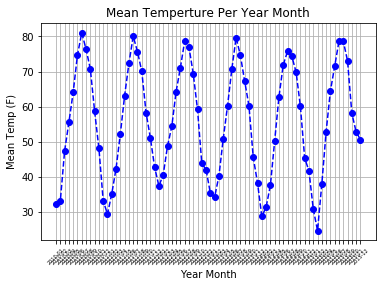

In [57]:
plt.plot(mean_temp.index, mean_temp,'o--', c="blue")
plt.title("Mean Temperture Per Year Month")
plt.ylabel("Mean Temp (F)")
plt.xlabel("Year Month")
plt.xticks(rotation=45)
plt.tick_params(axis='x', which='major', labelsize=5)
plt.grid(True)
plt.show()

In [41]:
mean_temp_year = nyc_temp.groupby(["Year"]).mean()["Mean Temp (F)"]
mean_temp_year.index=mean_temp_year.index.to_series().astype(str)

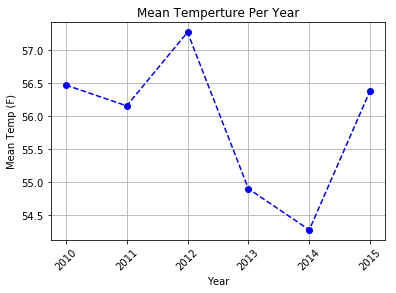

In [59]:
plt.plot(mean_temp_year.index, mean_temp_year,'o--', c="blue")
plt.title("Mean Temperture Per Year")
plt.ylabel("Mean Temp (F)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.grid(True)
plt.show()